In [232]:
import pandas as pd
import numpy as np
import pandas as pd
import datetime
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from scipy.stats import anderson_ksamp
from scipy.stats import ks_2samp
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# load curves
curves = np.load('curves.npy') # all mask (hsi)
curves_hsi = np.load('curves_all_hsi.npy') # all w spectra
curves_led = np.load('curves_led.npy') # led
curves_hps = np.load('curves_hps.npy') # high pressure sodium
curves_lps = np.load('curves_lps.npy') # low pressure sodium
curves_mh = np.load('curves_mh.npy') # metal halide
curves_f = np.load('curves_f.npy') # fluorescent

In [3]:
# load ons
ons = np.load('ons.npy') # all mask (hsi)
ons_hsi = np.load('ons_all_hsi.npy') # all w spectra
ons_led = np.load('ons_led.npy') # led
ons_hps = np.load('ons_hps.npy') # high pressure sodium
ons_lps = np.load('ons_lps.npy') # low pressure sodium
ons_mh = np.load('ons_mh.npy') # metal halide
ons_f = np.load('ons_f.npy') # fluorescent

In [4]:
# load offs
offs = np.load('offs.npy') # all mask (hsi)
offs_hsi = np.load('offs_all_hsi.npy') # all w spectra
offs_led = np.load('offs_led.npy') # led
offs_hps = np.load('offs_hps.npy') # high pressure sodium
offs_lps = np.load('offs_lps.npy') # low pressure sodium
offs_mh = np.load('offs_mh.npy') # metal halide
offs_f = np.load('offs_f.npy') # fluorescent

In [5]:
# load durations
duration = np.load('duration.npy') # all mask (hsi)
duration_hsi = np.load('duration_hsi.npy') # all w spectra
duration_led = np.load('duration_led.npy') # led
duration_hps = np.load('duration_hps.npy') # high pressure sodium
duration_lps = np.load('duration_lps.npy') # low pressure sodium
duration_mh = np.load('duration_mh.npy') # metal halide
duration_f = np.load('duration_f.npy') # fluorescent

In [6]:
def make_master(n,f):
    n *= 1.0
    f *= -1.0
    m = n + f
    return m

In [7]:
master = make_master(ons,offs)
master_hsi = make_master(ons_hsi,offs_hsi)
master_led = make_master(ons_led,offs_led)
master_hps = make_master(ons_hps,offs_hps)
master_lps = make_master(ons_lps,offs_lps)
master_mh = make_master(ons_mh,offs_mh)
master_f = make_master(ons_f,offs_f)

# Plot light curves

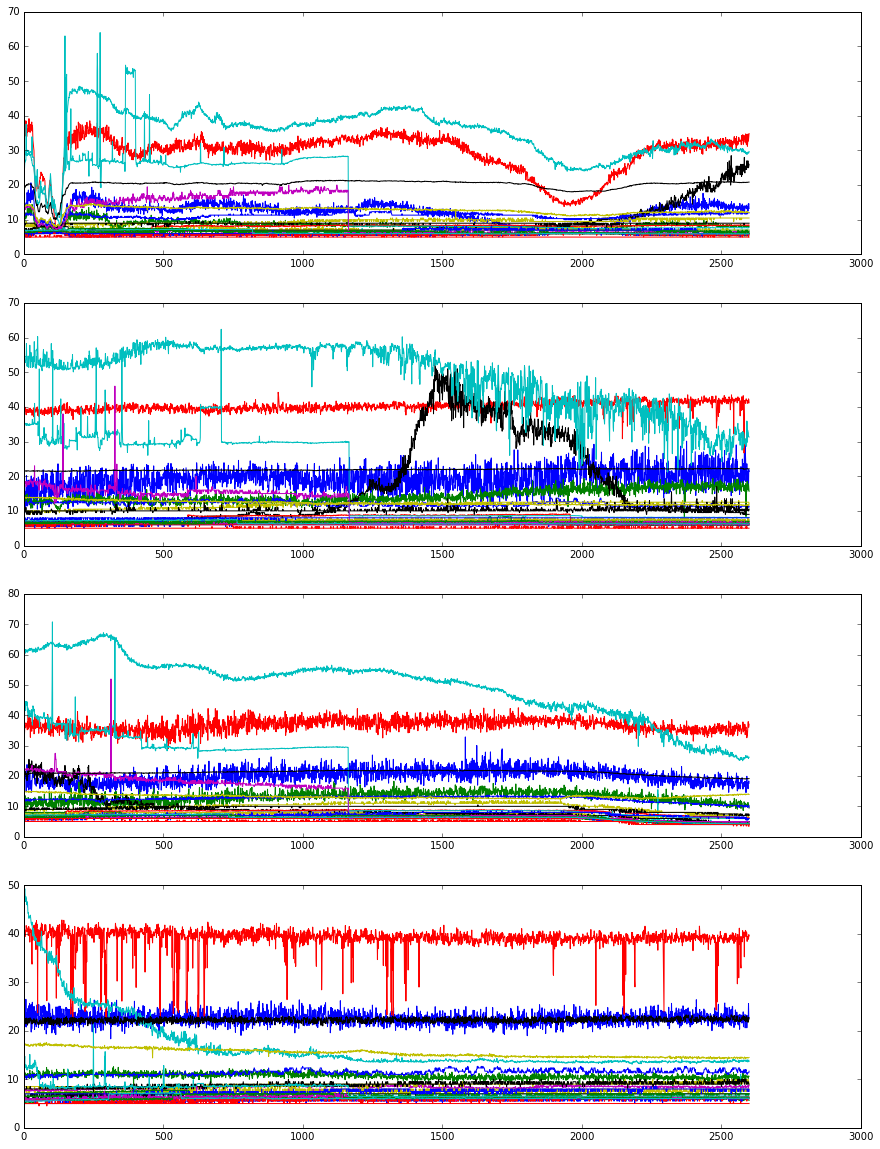

In [8]:
plot_data = curves_mh
fig = plt.figure(figsize=(15,20))

ax1 = fig.add_subplot(411)
ax1 = plt.plot(plot_data[12,:,:])

ax2 = fig.add_subplot(412)
ax2 = plt.plot(plot_data[13,:,:])

ax3 = fig.add_subplot(413)
ax3 = plt.plot(plot_data[14,:,:]);

ax4 = fig.add_subplot(414)
ax4 = plt.plot(plot_data[10,:,:]);

### Plotting curves

In [12]:
# on = True
# night = 9
# first_night = np.datetime64('2017-06-25')
# if on:
#     temp = ons
#     tag = 1
# else:
#     temp = offs*-1
#     tag = 1


# i,j = np.where(temp[night,:,:]==tag)
# _, idx = np.unique(j, return_index=True)

# fig = plt.figure(figsize=(15,15))
# plt.imshow(temp[night,:,j[np.sort(idx)]],cmap='gist_gray', interpolation='nearest')
# plt.title("{} for {}".format('On tags' if on else 'Off tags',first_night+night));

In [13]:
# new = go_curves[6]*1.0 / np.amax(go_curves[6],axis=0);
# plt.hist(new.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k');

In [14]:
def tags(c,m,night,sort_on):
    
    i,j = np.where(m[sort_on,::-1,:]==tag)
    _, idx = np.unique(j, return_index=True)

    data = c[night]*1.0 / np.amax(c[night],axis=0)

    x,y = np.where(m[night,:,j[np.sort(idx)][::-1]].T == tag)
    
    return data[:,j[np.sort(idx)][::-1]].T, x, y

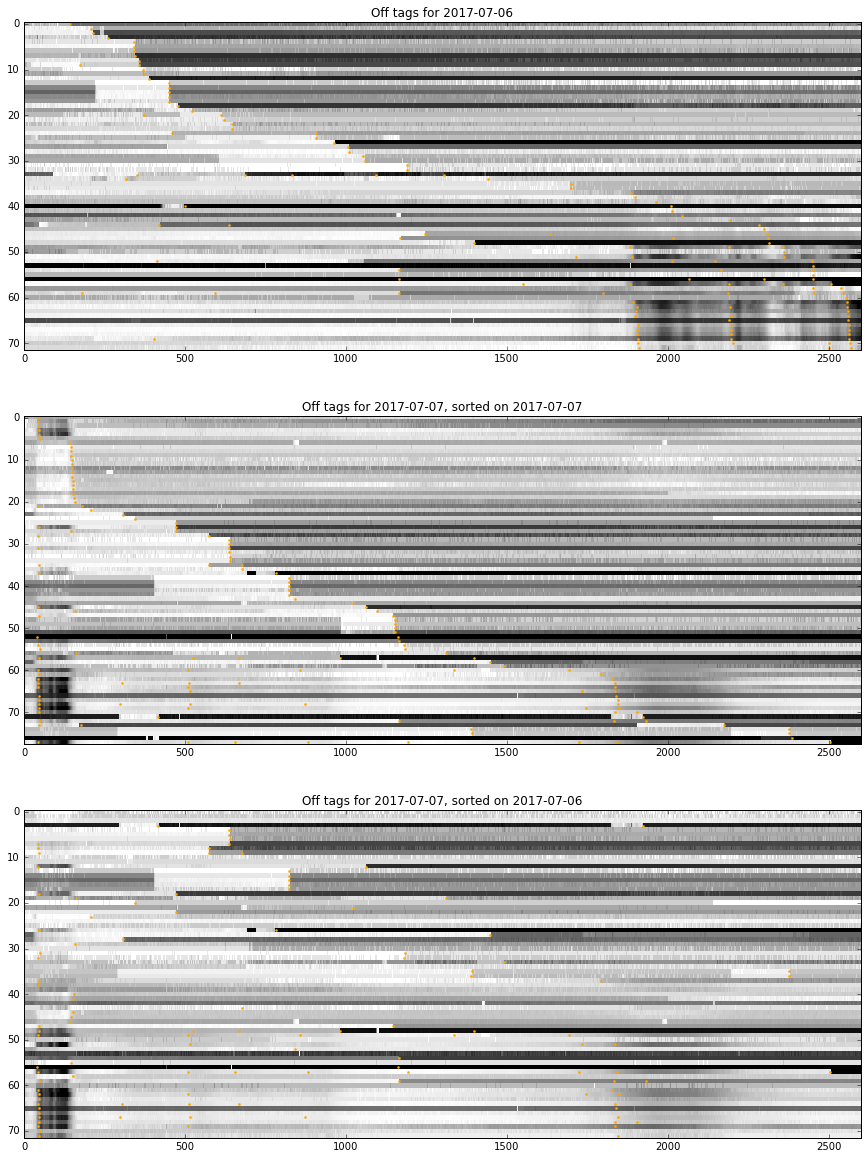

In [15]:
# utils
c = curves_led
m = master_led
night1 = 11
night2 = 12
off = True
first_night = np.datetime64('2017-06-25')
if off: 
    tag = -1.0
    tag_title = "Off"
else:
    tag = 1.0
    tag_title = "On"

fig, ax= plt.subplots(3, 1, figsize=(15, 20))
ax1, ax2, ax3 = ax

ax1.set_title("{} tags for {}".format(tag_title, first_night+night1))
pnts, = ax1.plot(tags(c,m,night1,night1)[1],tags(c,m,night1,night1)[2],'o',fillstyle='full',
                 mec='orange',color='orange',ms=2)
ax1.imshow(tags(c,m,night1,night1)[0],cmap='gray', interpolation='nearest',vmin=0.3,aspect='auto');

ax2.set_title("{} tags for {}, sorted on {}".format(
        tag_title, first_night+night2, first_night+night2))
pnts, = ax2.plot(tags(c,m, night2, night2)[1],tags(c,m, night2, night2)[2],'o',fillstyle='full',
                 mec='orange',color='orange',ms=2)
ax2.imshow(tags(c,m, night2, night2)[0],cmap='gray', interpolation='nearest',vmin=0.3,aspect='auto');

ax3.set_title("{} tags for {}, sorted on {}".format(
        tag_title, first_night+night2, first_night+night1))
pnts, = ax3.plot(tags(c, m, night2, night1)[1],tags(c, m, night2, night1)[2],'o',fillstyle='full',
                 mec='orange',color='orange',ms=2)
ax3.imshow(tags(c, m, night2, night1)[0],cmap='gray', interpolation='nearest',vmin=0.3,aspect='auto');

#### Duration

In [16]:
print"All lights in mask total hrs duration: {}".format((duration.sum()/3600).round(2))
print"All lights in mask mean hrs duration: {}".format((duration.sum(axis=0).mean()/3600).round(2))
print"or {} minutes".format((duration.sum(axis=0).mean()/60).round(2))
print"Total sources: {}".format(duration.shape[1])
print"Total nights: {} at {:.2f} min/night for {} total hours".format(duration.shape[0],(2600.0/6),
                                                                 duration.shape[0]*2600.0/6)

All lights in mask total hrs duration: 4040.01
All lights in mask mean hrs duration: 3.19
or 191.62 minutes
Total sources: 1265
Total nights: 27 at 433.33 min/night for 11700.0 total hours


In [17]:
print"All lights in w/ classification total hrs duration: {}".format((
        duration_hsi.sum()/3600).round(2))
print"All lights in w/ classification mean hrs duration: {} hrs or {} minutes".format((
        duration_hsi.sum(axis=0).mean()/3600).round(2),
                                                (duration_hsi.sum(axis=0).mean()/60).round(2))
print"Total classified sources: {}".format(duration_hsi.shape[1])

All lights in w/ classification total hrs duration: 570.12
All lights in w/ classification mean hrs duration: 3.07 hrs or 183.91 minutes
Total classified sources: 186


In [18]:
print"LED total hrs duation: {}".format((
        duration_led.sum()/3600).round(2))
print"LED mean hrs duration: {} hrs or {} minutes".format((
        duration_led.sum(axis=0).mean()/3600).round(2),
                                                (duration_led.sum(axis=0).mean()/60).round(2))
print"Total LED sources: {}".format(duration_led.shape[1])

LED total hrs duation: 352.42
LED mean hrs duration: 2.91 hrs or 174.75 minutes
Total LED sources: 121


In [19]:
print"HPS total hrs duation: {}".format((
        duration_hps.sum()/3600).round(2))
print"HPS mean hrs duration: {} hrs or {} minutes".format((
        duration_hps.sum(axis=0).mean()/3600).round(2),
                                                (duration_hps.sum(axis=0).mean()/60).round(2))
print"Total HPS sources: {}".format(duration_hps.shape[1])

HPS total hrs duation: 40.62
HPS mean hrs duration: 4.51 hrs or 270.83 minutes
Total HPS sources: 9


In [20]:
print"LPS toal hrs duation: {}".format((
        duration_lps.sum()/3600).round(2))
print"LPS mean hrs duration: {} hrs or {} minutes".format((
        duration_lps.sum(axis=0).mean()/3600).round(2),
                                            (duration_lps.sum(axis=0).mean()/60).round(2))
print"Total LPS sources: {}".format(duration_lps.shape[1])

LPS toal hrs duation: 2.83
LPS mean hrs duration: 0.94 hrs or 56.64 minutes
Total LPS sources: 3


In [21]:
print"Metal Halide hrs duation: {}".format((
        duration_mh.sum()/3600).round(2))
print"MH mean hrs duration: {} hrs or {} minutes".format((
        duration_mh.sum(axis=0).mean()/3600).round(2),(duration_mh.sum(axis=0).mean()/60).round(2))
print"Total MH sources: {}".format(duration_mh.shape[1])

Metal Halide hrs duation: 88.38
MH mean hrs duration: 3.54 hrs or 212.12 minutes
Total MH sources: 25


In [22]:
print"Fluorescent hrs duation: {}".format((
        duration_f.sum()/3600).round(2))
print"FL mean hrs duration: {} hrs or {} minutes".format((
        duration_f.sum(axis=0).mean()/3600).round(2),
                                            (duration_f.sum(axis=0).mean()/60).round(2))
print"Total FL sources: {}".format(duration_f.shape[1])

Fluorescent hrs duation: 85.86
FL mean hrs duration: 3.07 hrs or 183.99 minutes
Total FL sources: 28


In [146]:
duration_led.shape

(27, 121)

#### Scale across sources for each night (i.e. independent samples)

In [205]:
# list of all durations
all_classes = [duration_led,duration_f, duration_hps,duration_lps,duration_mh]
norm_classes = []

# concatenate along axis 1
agg = np.concatenate(all_classes,axis=1)

# 0-centered standardization
agg = abs(agg - agg.mean(axis=1, keepdims=True))
agg /= agg.std(axis=1, keepdims=True)

# separate arrays
for i in all_classes:
    norm_classes.append(agg[:,:i.shape[1]])

In [206]:
test = np.concatenate(norm_classes[0:2],axis=1)
control = np.concatenate(norm_classes[2:],axis=1)

In [228]:
utest = np.concatenate(all_classes[0:2],axis=1)
ucontrol = np.concatenate(all_classes[2:],axis=1)

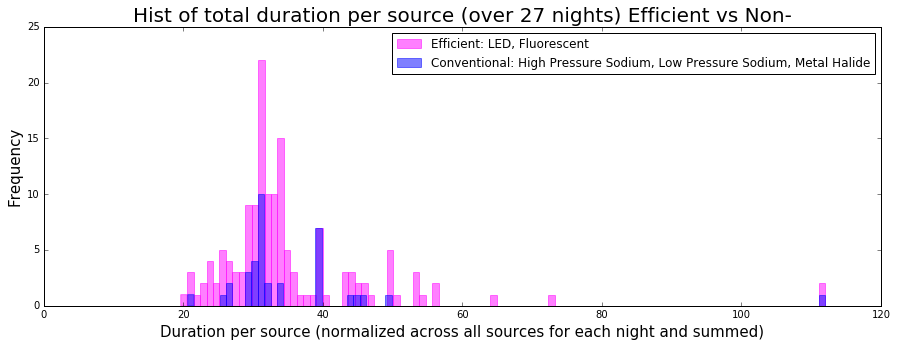

In [270]:
fig,ax = plt.subplots(1,1,figsize=(15,5))
ax.hist(test.sum(axis=0),bins=100, fc='magenta', ec='magenta',alpha=0.5,
        label="Efficient: LED, Fluorescent");
ax.hist(control.sum(axis=0),bins=100, fc='b', ec='b',alpha=0.5,
        label="Conventional: High Pressure Sodium, Low Pressure Sodium, Metal Halide");
ax.legend();
ax.set_title('Hist of total duration per source (over 27 nights) Efficient vs Non-',fontsize=20)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_xlabel('Duration per source (normalized across all sources for each night and summed)',fontsize=15);

In [260]:
ks_2samp(test.sum(axis=0),control.sum(axis=0))

Ks_2sampResult(statistic=0.14474877562125882, pvalue=0.53063147210721961)

In [256]:
anderson_ksamp([test.sum(axis=0),control.sum(axis=0)])

Anderson_ksampResult(statistic=-0.55056557963451025, critical_values=array([ 0.325,  1.226,  1.961,  2.718,  3.752]), significance_level=0.6220157540796374)

In [257]:
ttest_ind(test.sum(axis=0),control.sum(axis=0))

Ttest_indResult(statistic=-0.15310887826108602, pvalue=0.87848019203875549)